# Analysis of Drive Cycle Parameters on the Energy Consumption in Battery Electric Vehicles
Steffen Thevis - August 18, 2023

# Abstract
In response to the climate and environmental emergency declaration by the European Parliament in November 2019, significant efforts have been directed towards achieving ambitious climate goals. The European Union (EU) set its sights on limiting global warming to below 1.5°C and adopting climate neutrality by 2050. The transportation sector accounts for a substantial portion of EU greenhouse gas emissions, thus becoming a a key piece to achieve this goal. The most prominent current outlook, especially for the personal transportation is the change to electric vehicles. This project looks into the influence of drive cycle properties – total driven altitude, average speed, and maximum distance – on the energy consumption of battery electric vehicles (BEVs). Through parameter sensitivity analysis and multiple linear regression, the impact of these properties on energy consumption are quantified. While the sensitivity analysis provides unreliable results due to limited sample sizes, the multiple linear regression approach returns more trustworthy insights. The analysis reveals that distance has the greatest influence on energy consumption, followed by average speed and altitude.
More collection and analysis of additional data sets is necessary to substantiate the findings of this project. 


# Introduction



On November 28, 2019, the European Parliament declared a climate and environmental emergency. This prompted the Commission to be urged to ensure that all relevant legislative and budgetary proposals fully align with the goal of limiting global warming to below 1.5°C[(European Parliament declares climate emergency)](https://www.europarl.europa.eu/news/de/headlines/priorities/klimawandel/20191121IPR67110/europaisches-parlament-ruft-klimanotstand-aus). Following this, a call for the Parliament to present a strategy for achieving climate neutrality by 2050 and to anchor the increase of emission reduction from 40% to 55% by 2030 (compared to 1990) in the "Green Deal for Europe" was made.

With the EU Climate Law coming into effect on July 29, 2021, the EU committed to adhere to the mentioned climate goals [(Overview of the climate negotiations)](https://www.europarl.europa.eu/infographic/climate-negotiations-timeline/index_de.html). Achieving these goals requires restructuring and improving measures to reduce greenhouse gas emissions in various sectors. The main focus lies on the transportation sector, which generates approximately one-fourth of all EU greenhouse gas emissions [(Transport and Green Deal)](https://ec.europa.eu/info/strategy/priorities-2019-2024/european-green-deal/transport-and-green-deal_de).

Said sector is the only one that hasn't reduced its greenhouse gas emissions compared to 1990; in fact, its emissions have increased by 33.5% [(Transport and Environment Report 2021)](https://www.eea.europa.eu/publications/transport-and-environment-report-2021), with 71.7% of those emissions attributed to road transportation.

Road transportation accounts for 72% of the EU's transportation-related emissions. Within these emissions, 60.6% can be attributed to passenger cars, making them significantly influential in the CO2 balance. While strict EU standards regarding emission values have mitigated this effect, the need for "widespread electrification of vehicle fleets and expansion of charging infrastructure" remains [(Transport and Environment Report 2021)](https://www.eea.europa.eu/publications/transport-and-environment-report-2021), [(eu_parliament_co2_emissions_pkw)](https://www.europarl.europa.eu/news/de/headlines/society/20190313STO31218/co2-emissionen-von-pkw-zahlen-und-fakten-infografik).

Now, exchanging a conventional vehicle for an electric one is not an easy decision, as battery electric vehicles (abbreviated as "BEV" in the course of the text) tend to have some different restrictions. The limited range and the longer time to refill the energy storage in contrast to conventional vehicles requires the customer to change their habits when using their personal car. Some users may even find an electric alternative not viable for their day-to-day use because of long driving distances, while others may not know that an electric alternative can easily handle their driving demands.

This project aims to find out more about the influence of drive cycle properties like total driven altitude, average speed, and maximum distance on the total energy consumption of a BEV. The goal is to influence the decision-making in favor of BEV for potential customers by quantifying the cycle properties with numbers, allowing for an easier evaluation of personal day-to-day drives and drawing a conclusion whether an electric vehicle might be a viable option. Parameters will be evaluated by analyzing real drive cycle data with linear regression models to determine numbers for the influence of each cycle parameter. The drive cycle data used for the analysis is a publicly available dataset collected by the TU Munich. This dataset contains signals extracted from the onboard diagnosis (OBD) interface during almost 150 real-world driving situations [(Electric powertrain data of a Volkswagen ID.3 during real-world driving situations)](https://mediatum.ub.tum.de/1656313).

# Materials and Methods

Starting of with the working basis, the dataset contains a varying number of time-dependent signals saved as .csv files. The three signals that are of most interest for the upcoming evaluation are the vehicle's speed, the current altitude, and the current driven distance. All of these signals are contained in each measurement file.
As the goal is to evaluate the energy consumed by the vehicle during a cycle, it is necessary to set up the relations between energy consumption and the three signals mentioned before.

## Energy Calculation
This can be done by first calculating the driving resistances at each recorded point in time. The total resistance can then be transformed into the momentary power necessary to propel the vehicle, and thus, by integrating the momentary power values over time, the energy consumption can be calculated. Starting off with the resisting forces, 
the total resistance consists of four main parts:
$$
    F_{res,total} = F_{air} + F_{acc} + F_{roll} + F_{slope}
$$
Here, $F_{air}$ represents the velocity and vehicle parameter-dependent air drag resistance
$$
    F_{air} = \frac{1}{2} \cdot c_w \cdot A \cdot \rho_L \cdot (v_{Veh} + v_{Wind})^2
$$
with $c_w$ being the vehicle-specific air drag coefficient, $A$ the vehicle's frontal surface area, and $\rho_L$ the air density. Furthermore, the relative velocity working against the vehicle consists of the driven velocity $v_{Veh}$ and the wind velocity $v_{Wind}$. As there are no measurements of the wind velocity during the cycles, it is neglected; thus, the air drag is only dependent on the vehicle velocity. 
The second resistance force $F_{acc}$ is the resistance caused by acceleration, which can be represented by Newton's second law of motion
$$
    F_{acc} = a_{Veh} \cdot m_{total}
$$
where $a_{Veh}$ represents the vehicle's acceleration and $m_{total}$ the vehicle's mass, as well as any additional loads. Usually, the inertia of rotating masses is contained in the acceleration resistance. As there is no information on the rotating masses and their influences are usually of lesser significance, they are neglected for the purpose of this calculation. 
The third resistance force is the rolling resistance $F_{roll}$: 
$$
    F_{roll} = f_r \cdot m_{total} \cdot g \cdot \cos{\alpha}
$$
Here, $f_r$ represents the dimensionless rolling resistance coefficient, $g$ the gravitational constant, and $\alpha$ the track's gradient.
Finally, $F_{slope}$ describes the resistance in downhill direction caused by the track's gradient. 
$$
    F_{slope} = m_{total} \cdot g \cdot \sin{\alpha}
$$
With the sum of all the aforementioned forces, it is possible to calculate the momentary resistance power by multiplying the total resistance force with the momentary vehicle velocity. 
$$
    P_{res,total} = F_{res,total} \cdot v_{Veh}
$$
Finally, by integrating the power values over time, the energy consumption at the wheel can be calculated.
$$
    E_{wheel} = \int_{t_0}^{t_{end}} P_{res,total} dt
$$
With assumptions for the efficiencies of the electric drive train while discharging, it would be possible to calculate the actual energy consumption of the battery. However, these efficiencies are dependent on the temperature and operating point of the electric machine and the drive train, information not provided by the measurements. To simplify the calculation, the evaluated energy will be the energy consumption at the wheel.


## Python Classes
Now looking at the resistance calculation, it is possible to derive two main classes of parameters that influence the energy consumption. On one hand, there are the vehicle parameters like the mass, the air drag coefficient, and the frontal surface area. On the other hand, there are the cycle parameters like the velocity at a measured point in time, as well as the acceleration and the current slope angle that can be calculated from the time-dependent measurements. 
With the Python programming language as the basis for the analysis, it makes sense to create two different classes for the influencing parameters. This would allow for a more modular approach, allowing the combination of a single vehicle with multiple or all drive cycles. Additionally, this structure allows for multiple vehicle types to be evaluated on the same cycle or set of cycles, creating the opportunity to evaluate the influence of the vehicle's parameters on the energy consumption.

### Class 'VehicleParameters'
Initially, the intention was to look not only at the Volkswagen ID.3, which was part of the measurement process, but to also determine the influence of different vehicle parameters on the energy consumption. Due to time constraints, the addition of multiple vehicle parameter sets is neglected, but the essential structure to do this does exist in the code.
The class 'VehicleParameters' will contain vehicle parameters with its standard initialization being the ID.3. The values stem from the paper associated with the measurements and an additional publicly available source [(Quantifying the state of the art of electric powertrains in battery electric vehicles)](https://www.sciencedirect.com/science/article/pii/S2590116822000133), [(Volkswagen ID.3 Pro - Übersicht und Spezifikationen)](https://ev-database.org/de/pkw/1531/Volkswagen-ID3-Pro), [(Rolling Friction Resistance)](https://www.engineeringtoolbox.com/rolling-friction-resistance-d_1303.html).
The standard initialization parameters and their respective sources can be found in the following table:  

##### Standard Vehicle Parameters for the Volkswagen ID.3

| Parameter Name | Value   | Source                  |
|----------------|---------|-------------------------|
| $A$            | 2.8365  | [(Volkswagen ID.3 Pro - Übersicht und Spezifikationen)](https://ev-database.org/de/pkw/1531/Volkswagen-ID3-Pro)                     |
| $c_w$          | 0.267   | [(Volkswagen ID.3 Pro - Übersicht und Spezifikationen)](https://ev-database.org/de/pkw/1531/Volkswagen-ID3-Pro)                     |
| $m_{total}$    | 1811    | [(Volkswagen ID.3 Pro - Übersicht und Spezifikationen)](https://ev-database.org/de/pkw/1531/Volkswagen-ID3-Pro)                     |
| $f_r$          | 0.008   | [(Rolling Friction Resistance)](https://www.engineeringtoolbox.com/rolling-friction-resistance-d_1303.html)                     |
| $r_{dyn}$      | 0.3468  | [(Quantifying the state of the art of electric powertrains in battery electric vehicles)](https://www.sciencedirect.com/science/article/pii/S2590116822000133)                     |

### Class 'DriveCycle'
The second class containing parameters is the 'DriveCycle' class. The general purpose of this class is to save the time-dependent altitude, distance, and speed signals. As the class properties consist fully of measurement data, there is no standardized initialization process. The construction of the class can only be achieved by linking a measurement file. To store the time-dependent data, a data frame from the data analysis library 'pandas' is utilized. During the storing process of the data, the sample time of the signals is re-timed into a one-second mean. 
This allows for an easier calculation of the momentary acceleration necessary for the energy calculation, but it also results in more realistic values for the slope angles.
Said angles are calculated for every time point by the following formula:
$$
    gradient[i] = \arctan\left(\frac{altitude[i+1]-altitude[i]}{distance[i+1]-distance[i]}\right)
$$
with 'gradient', 'altitude', and 'distance' being the names of the arrays containing the respective time-dependent signals according to their names. 
Apart from the preparation of the time-dependent signals, the class also keeps track of a collection of cycle characteristics, like the total distance driven during the cycle and the (positive) total climbed altitude. Additionally, the average nonzero speed, neglecting values below 0.3 meters per second, is saved as a characteristic. 
This results in a class of drive cycles that can be combined with any set of vehicle parameters for the energy calculation.

### Class 'Route'
The third and final class represents the combination of both previous classes. The main use of this class is to create an object containing the combined information from both classes so there is no need to keep track of two objects at a time. Additionally, there is new data out of the scope of the two previous classes to be generated, so a third object comes in handy. 
Class construction requires a 'DriveCycle'-object and a 'VehicleParameters'-object. During initialization of the class, the acceleration is calculated. Due to the previously mentioned change of the signal sample rate to one second, the acceleration can easily be calculated according to the following formula: 
$$
    acceleration[i] = velocity[i+1] - velocity[i]
$$
Now that all signals necessary for the energy calculation are collected in an object, the evaluation of said energy values is implemented according to the equations listed before by first calculating all forces, adding them up, multiplying with the time points specific velocity value and integrating the resulting power to receive the consumed energy.
After finishing construction, a 'Route' object contains the time-dependent vectors 'positive\_power' and 'negative\_power'. Furthermore, the object contains the scalar energy values 'positive\_energy', which is the integral over all positive power values, 'negative\_energy', the integral over all negative power values, as well as the resulting energy 'resulting\_energy', which is the sum of the positive and the negative energy.

## Parameter Influence Evaluation
Now that the basic energy calculation is dealt with, it is time to explain the approach on how to evaluate the energy's dependency on a specific drive cycle parameter. To achieve that goal, the initial idea is to create a data set of energy values dependent on their respective cycle characteristics and use a linear regression model to evaluate the standardized $\beta$ coefficient for each of the characteristics. This is done using two different methods.

### Parameter Sensitivity Analysis
The first approach to determine the standardized $\beta$ is a parameter sensitivity analysis (PSA). The idea behind this approach is to vary only a single one of the three parameters, that influence the data set, at a time. This means that a collection of points has to be found where two of the three parameters are more or less constant, while the variation in the third parameter is analyzed.
To execute the various functions the following cell provides some necessary setup. Make sure the dcnpanalysis package is installed according to instructions in the [README](https://git.rwth-aachen.de/arf.razor/drive-cycle-and-parameter-analysis/-/blob/main/README.md) and the filepath leads to the downloaded [dataset](https://mediatum.ub.tum.de/1656313).  

In [1]:
# Initial Setup
import dcnpanalysis.classes as classes
import dcnpanalysis.functions as functions


# Your filepath goes here
filepath = r'../data/tracks'

# Creating a dicitonary containing all cycles and their respective parameters, 
# as well as a list of all track identifiers
cycle_df, cycle_dict = functions.list_cycles(filepath)

To find cycles fitting the previous description, the function 'find\_parameter\_cycles' is implemented. The function parameters used during the function call are the maximum allowed deviation for the two 'constant' parameters, the parameter that is supposed to be analyzed via linear regression, and the data frame containing the cycles and their respective characteristics like total distance, climbed altitude, and mean velocity.
The function then goes over all data frame entries and compares the cycle characteristics of the parameters that are supposed to be kept constant. If the deviation between the characteristics are within the specified maximum deviation, the respective cycle is added to a list.
So in theory, a list of comparable cycles will be created for each table entry, practically only the largest list is saved during the process. If a table entry returns a longer list than the previously saved list, the currently saved one will be replaced.
Using this method, the longest list of comparable cycles will always be chosen for a parameter.
 An exemplary call of the 'find\_parameter\_cycles' function is implemented in the following cell.

In [2]:
# Parameter to find cycles for 
parameter = 'Altitude'

# Maximum allowed deviation for the parameters that stay constant
deviation = 5

# Get all tracks that can be used for parameter sensitivity analysis for parameter 'Speed'
tracks_altitude_df, tracks_altitude_list = functions.find_parameter_cycles(
    deviation = deviation,
    keyword = parameter,
    cycle_df = cycle_df
)

Before continuing with the parameter analysis, it makes sense to validate the energy calculation. This can be achieved by comparing the calculation results based on the resistance forces with the energy calculated from CAN data. This is possible as some measurements contain signals like 'engine\_rpm' and 'axle\_torque\_nominal', which represent the revolutions per minute and the torque at the wheel, two values that can easily be calculated into the power at the wheel using the following equation: 
$$
    P_{wheel} = M_{wheel} \cdot \frac{n}{60} \cdot 2\pi
$$
Here, $M_{wheel}$ represents the torque at the wheel and $n$ the revolutions per minute.  

Now it is necessary to check which cycles contain the aforementioned CAN signals and thus allow a comparison of energy values. This can be done with the help of the 'list\_validation\_cycles' function. This function is called by entering the path where the measurements are stored and returns a dictionary containing all cycles that contain the two special signals.
Combining the knowledge of the cycles available for validation and the cycles previously collected for the parameter sensitivity analysis, it is possible to filter out some examples. The filtering process utilizes the 'intersect\_cycles' function, returning a list of tracks that are part of the PSA and contain the signals necessary for validation. This list is then used for comparison plotting. An exemplary execution of the 'list\_validation\_cycles' function and the 'intersect\_cycles' is presented in the following cell. 

In [3]:
# Get all cycles that can be used for validation
cycles_for_validation = functions.list_validation_cycles(filepath)

# Find the tracks in the parameter tracklist that can be validated
viable_tracks = functions.intersect_cycles( 
    validation_tracks = cycles_for_validation,
    parameter_tracks = tracks_altitude_list
    )

To finally validate the energy calculation by comparing it to the measured signal, the function 'validation\_plots' is used. This function simply plots the energy values from the resistance energy calculation and the energy results from the measured signals in a bar plot next to each other, allowing for a direct comparison.

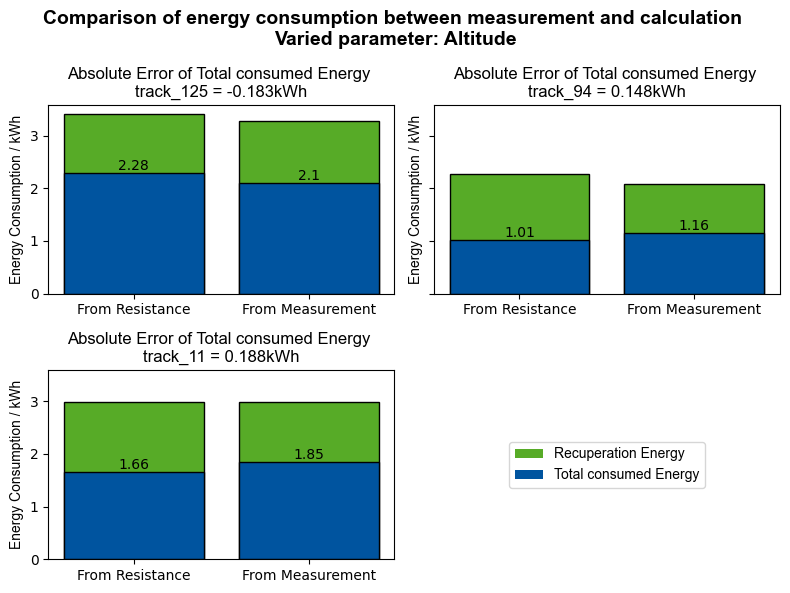

In [4]:
# Creating an object of vehicle properties
vehicle_parameters = classes.VehicleParameters()

# Run the plotting function to visualize the energy values
functions.validation_plots(
    cycles_for_validation = cycles_for_validation,
    vehicle_parameters = vehicle_parameters,
    viable_track_list = viable_tracks,
    varying_parameter = parameter,
    cycle_dict = cycle_dict,
    saveplot = False,
)

To avoid doing all the previously mentioned steps one at a time, another function 'run\_psa\_cycle\_validation' exists, basically using the previous steps as helper functions and simplifying the process of validation. A detailed application of the  'run\_psa\_cycle\_validation' function can be found in the following cell.

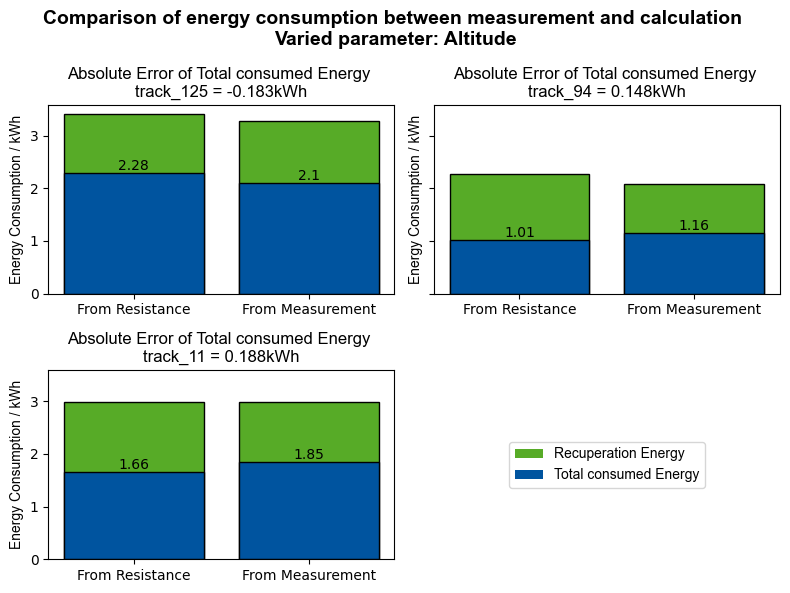

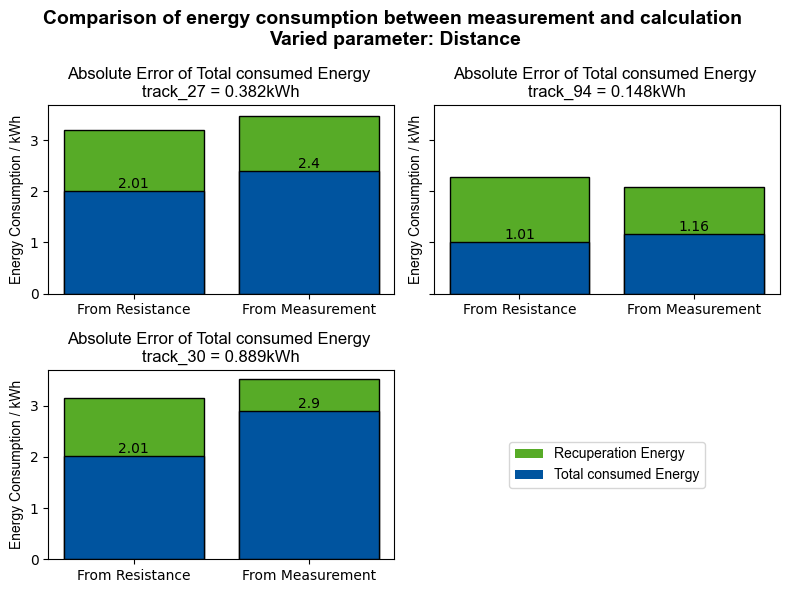

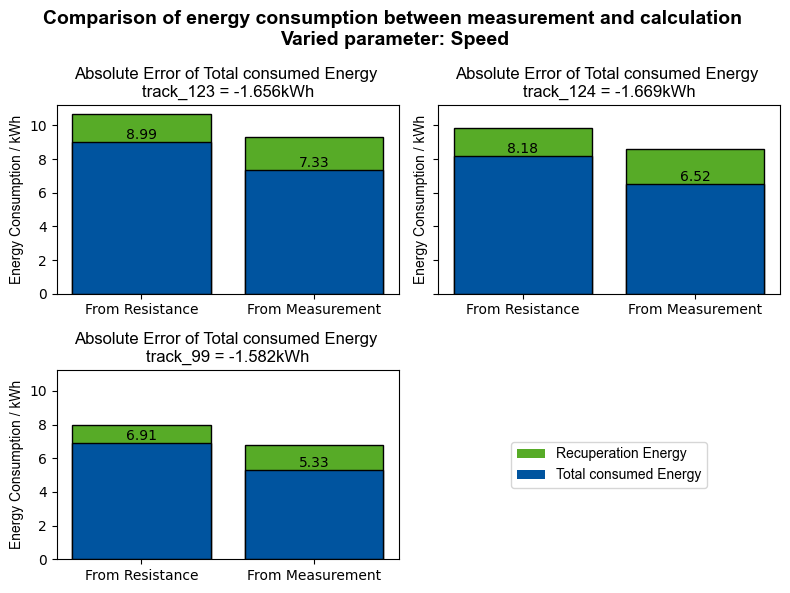

In [5]:
 # List all parameters and their deviation as tuples. 
parameter_list = [('Altitude', 5), ('Distance', 10), ('Speed', 5)]

# Execute the validation as a combination of helper functions
functions.run_psa_cycle_validation(
        vehicle_parameters = vehicle_parameters,
        cycle_df = cycle_df, 
        cycle_dict = cycle_dict, 
        parameter_list = parameter_list, 
        filepath = filepath,
        saveplot = True
)

After the validation, the actual parameter sensitivity analysis can take place through the function of the same name. Said function utilizes the 'evaluate\_routes' helper function to calculate the energy values dependent on the specified tracks in combination with the vehicle parameters. For the linear regression itself, the helper class 'LinearRegressionObject', utilizing the scikit-learn functions 'LinearRegression' and 'StandardScaler' comes in handy. It is used to calculate the standardized $\beta$ values for all parameters specified while calling the function.<br>
The 'parameter\_sensitivity\_analysis' function returns a list of the evaluated parameters and their respective standardized betas, which can be used in a follow-up step to compare the parameters' influence. The function also allows for plotting of the regression lines inside a scatter the analyzed parameters chosen tracks. Application of the 'parameter\_sensitivity\_analysis' function and the 'plot\_std\_betas' function is presented in the following cells.

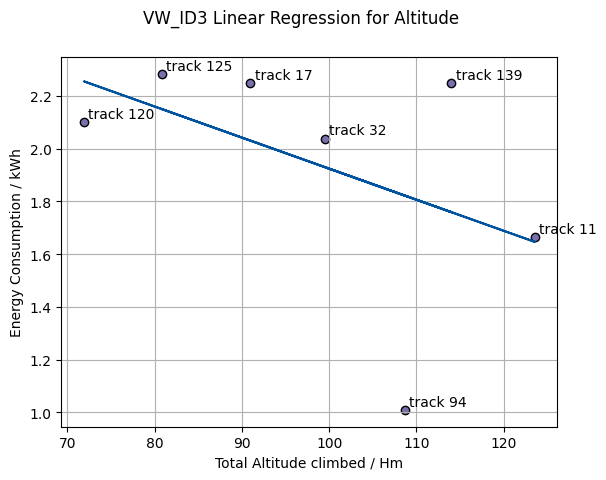

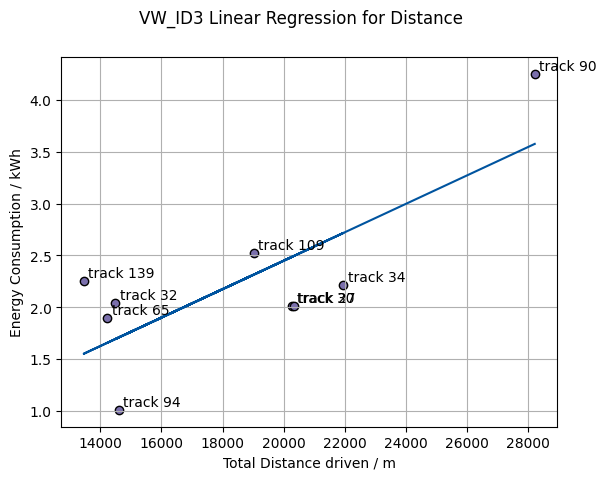

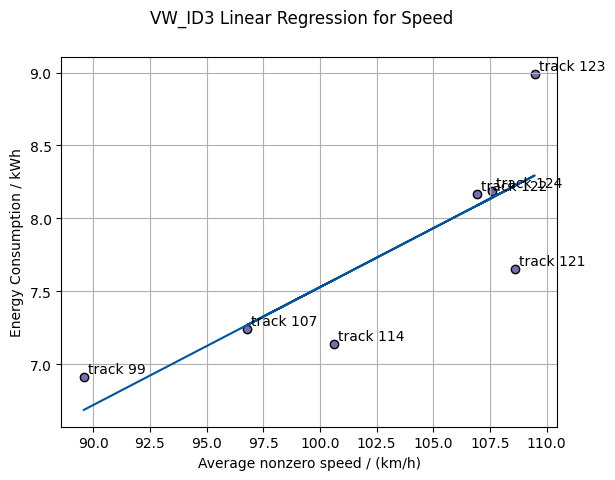

In [6]:
 # Redefinition of the parameter list
parameter_list = [('Altitude', 5), ('Distance', 10), ('Speed', 5)]

# Run the parameter sensitvity analysis for all parameters
std_betas, x_categories = functions.parameter_sensitivity_analysis(
    vehicle_parameters = vehicle_parameters,  
    parameter_list = parameter_list, 
    cycle_dict = cycle_dict,
    plot_regression = True, 
    cycle_df = cycle_df,
    save_plot = False
)

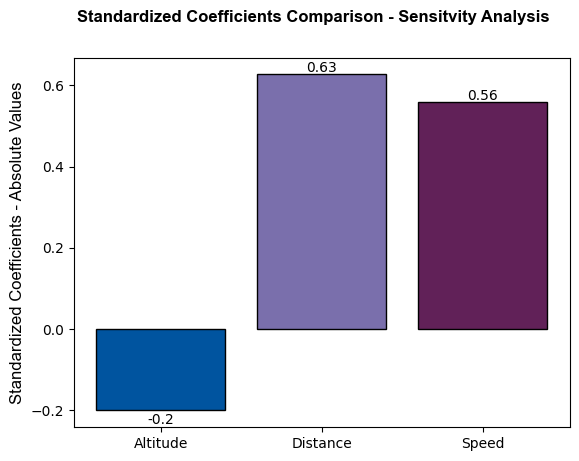

In [7]:
# Plot the resulting standardized beta coefficients for the parameter sensitivity analysis
functions.plot_std_betas(
    x_categories = x_categories, 
    std_betas = std_betas, 
    saveplot = False,
    type = 'psa'
)

### Multiple Linear Regression
Due to the small amount of cycles available for the parameter sensitivity analysis and the consequentially unreliable results, which will be discussed in the results section, another method to evaluate the relations between cycle parameters and energy consumption is conducted. The new approach also uses linear regression methods but now without filtering the cycles, which allows for a bigger data set. As there are multiple variables now, the standard linear regression model is replaced by multiple linear regression according to the formula:
$$
    y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \beta_3 \cdot x_3
$$
With $y$ being the dependent variable, in this case, the energy and the $\beta$ s being the slope coefficients for each explanatory variable.

In order to evaluate the data with the new model, the function 'multiple\_linear\_regression' is implemented. To call this function, the dictionary containing all drive cycles, the data frame containing the cycle properties, and the vehicle parameters are necessary. Upon call, the function calculates the energy values of all drive cycles in combination with the specified vehicle parameters. The energy values are then added into a vector of y-values and the three parameters are saved as a pandas data frame with three columns.

The full data set is then split into train and test data sets. This can be achieved by making use of the 'train\_test\_split' function provided by the scikit-learn python package. The x-data used for training is then scaled, which is necessary to later calculate the standardized $\beta$ values. Scaling can be achieved by using the 'fit\_transform' function, also provided by scikit-learn [(Train Test Split)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

The actual multiple linear regression is then conducted by using a 'LinearRegression' object and using its function 'fit' [(Scikit Learn Linearregression)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). The standardized $\beta$s are finally calculated by dividing the fit results by the standard deviation of the previously transformed x-data. After fitting, a cross-validation score is calculated using scikit-learn's 'cross\_val\_score' function. The model is also compared via test data utilizing the 'score' function from scikit-learn [(Scikit Learn Crossvalidation)](https://scikit-learn.org/stable/modules/cross_validation.html). The evaluation scores are displayed, and the resulting $\beta$ values are plotted with the same function used for the parameter sensitivity analysis before. The function also enables the parallel coordinates plotting of the parameters and the energy, however the execution of this function will not work inside a jupyter environment and has to be exectued via script. 

An application of the 'multiple\_linear\_regression' and the plotting of its results can be found in the following cell.

In [8]:
# Run the multiple linear regression
mlr_std_betas, mlr_x_categories, mlr_cv_score, test_dataset_score = functions.multiple_linear_regression(
    vehicle_parameters = vehicle_parameters,
    cycle_dict = cycle_dict,
    plot_mlr_data = False,
    cycle_df = cycle_df
)

display('MLR cross validation score: ', mlr_cv_score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (mlr_cv_score.mean(), 
                                                             mlr_cv_score.std()))
display('Test dataset score: ', test_dataset_score)

'MLR cross validation score: '

array([0.93505724, 0.9056701 , 0.33381848, 0.98036275, 0.99414819])

0.83 accuracy with a standard deviation of 0.25


'Test dataset score: '

0.9533613391212489

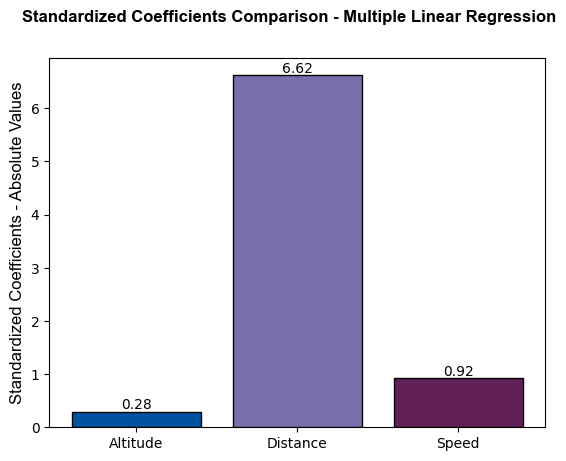

In [9]:
# Plot the resulting beta values
functions.plot_std_betas(
    x_categories = mlr_x_categories, 
    std_betas = mlr_std_betas, 
    saveplot = False,
    type = 'mlr'
)

# Results
Now that the implementation has been explained, the results need to be viewed and discussed. First, the results of the energy calculation will be reviewed, then the parameter sensitivity analysis and the multiple linear regression will be evaluated.

## Validation of the Energy Calculation
The following plots show a subset of tracks used to evaluate the $\beta$ values for each parameter during the parameter sensitivity analysis. This means that if the plot title says 'varied parameter: Altitude', the plots were specifically chosen by the 'find\_parameter\_cycles' function to only vary parameter altitude and keep the other parameters within a maximum deviation. Additional filtering is then done to pick the cycles that contain the axle signals used for later validation.<br>
The energy validation bar plots for the sensitivity analysis of the three parameters are given in below. 

![egy_validation_altitude](https://git.rwth-aachen.de/arf.razor/drive-cycle-and-parameter-analysis/-/raw/main/report/latex/Figures/energy_validation_altitude.png)

![egy_validation_distance](https://git.rwth-aachen.de/arf.razor/drive-cycle-and-parameter-analysis/-/raw/main/report/latex/Figures/energy_validation_distance.png)

![egy_validation_speed](https://git.rwth-aachen.de/arf.razor/drive-cycle-and-parameter-analysis/-/raw/main/report/latex/Figures/energy_validation_speed.png)

On first glance, the resulting energy consumption, represented by the blue bars, calculated with the resistance forces, seems to return a very similar energy consumption as their counterparts calculated from axle measurements. Additionally, the recuperated energy values, represented by the green bar on top of the resulting energy consumption, also seem similar in their value. Some general trends to be observed when looking at the tracks from the altitudes and the distances dependency analysis are that the recuperated energy calculated from resistance forces tends to be greater than the recuperated energy from the axle measurements. This is especially obvious in tracks 94 and 30 in the distance's validation plots. Track 94 also appears in the plot for parameter variation of 'altitude'. This distinction might stem from the interpolation of the signals from signal per millisecond into signal per second for during the resistance calculation. As this issue is not prevalent in all plotted tracks and the resulting energy values seem to fit generally, the reason might also be due to a problem with the data collection of the specified tracks. For the parameter variation of speed, the resulting energy consumption values calculated by resistance tend to be higher than their measured counterparts. The reason for this might be, as mentioned before, the interpolation during the energy calculation based on the resistance, which due to the longer cycles (more energy consumption) might result in higher mean values for parameters like speed. Summing up the results of the validation, overall the results of the energy calculation seem to be in the same ballpark when comparing axle measurements and resistance calculation. Additionally, there is no guarantee for the axle measurements to be totally correct, but it is the only reference to compare to that is available. 


## Parameter Sensitivtiy Analysis 
The parameter sensitivity analysis first results were created during the validation process of the energy calculation. For the purpose of the general trend analysis, the energy values resulting from the resistance calculation are assumed to be sufficient in terms of their accuracy.
Utilizing said energy values, the resulting parameter dependencies can be calculated and visualized. The following figure shows the parameter sensitivity analysis $\beta$ values.

![psa_results](https://git.rwth-aachen.de/arf.razor/drive-cycle-and-parameter-analysis/-/raw/main/report/latex/Figures/beta_bars_psa.png)

The most obvious anomaly to be observed is the negativity of the $\beta$ value describing the dependency on altitude. This implies that the more altitude meters a track has, the less the overall energy is consumed when driving said track. In other words, if two tracks of the same overall distance and the same average speed are compared in their energy consumption, the track with more altitude will consume less energy overall. Now this might be correct for a track that is just straight downhill, but during the evaluation of the cycle characteristics, only positive values are counted, meaning that the more positive altitude meters are part of a track, the less energy is consumed. This result is very unbelievable. The issue is most likely caused by a very small sample size during the linear regression when varying the parameter 'Altitude', thus resulting in a wrong trend.

This obvious problem raises questions regarding the other two $\beta$ values as well. The dependency on distance and speed seems fine at first glance, even though it is expected for the energy consumption to be even more dependent on driven distance as it is the most prevalent factor when discussing the usage of electric drivetrains over internal combustion engines. A big issue with the parameter analysis is that there is no way to verify the results with test data sets, thus the results are not trustworthy.

## Multiple Linear Regression

Due to the unreliable results of the previously applied method, the multiple linear regression approach is used to determine the same standardized coefficients. This results in the values represented in the following figure. 

![mlr_results](https://git.rwth-aachen.de/arf.razor/drive-cycle-and-parameter-analysis/-/raw/main/report/latex/Figures/beta_bars_psa.png)

Here, the first observation to really stand out is the influence of the cycle's distance. With a beta value of 6.62, the distance is more than seven times as influential as the average speed with a value of 0.92 and more than twenty-three times as influential as the altitude during a cycle. Now the distance is expected to have a strong influence on the vehicle's energy consumption, but being seven times more influential than the vehicle's speed does seem exaggerated.

For this method, two ways of validation are applied, as briefly mentioned in the section regarding the 'Multiple Linear Regression'. The first validation method is cross-validation, which according to the standard setting in the scikit-learn package, splits the training data set into five folds. These five folds return values between 0.334 and 0.994. All the values can be found in the table below. With most of the values being close to the highest $R^2$ value, which is one, except for one outlier, it is possible to conclude that the model returns trustworthy results.



#### $R^2$ values - Cross-validation

| Fold 1       | Fold 2      | Fold 3      | Fold 4      | Fold 5      |
|--------------|-------------|-------------|-------------|-------------|
| 0.93505724   | 0.9056701   | 0.33381848  | 0.98036275  | 0.99414819  |

The second validation method is using the 'score' function of 'LinearRegression' objects in the scikit-learn package [(Scikit Learn Linearregression)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). The actual regression model is trained on one split of the data set, and the score function is applied to the second split of the data set, returning an $R^2$ error value. The resulting value of around 0.953 indicates that the multiple linear regression model has a strong explanatory power and is capable of explaining approximately 95.3\% of the variance in the dependent variable. This suggests that the model is a good fit for the data.

In conclusion, the Parameter Sensitivity Analysis does not seem like the correct method for the intended evaluation. The multiple linear regression delivers answers that are based on a way larger data set and additionally allows for cross-validation and scoring with an additional test data set, making it the superior approach.

# Discussion
Linear regression coefficients were determined using both the Parameter Sensitivity Analysis method and the multiple linear regression approach. After examining the results of the parameter sensitivity analysis, especially in comparison to the values determined via the multiple linear regression, it becomes clear that the PSA approach is likely not suitable for the given dataset.

The main reason for this is that the ability to vary only a single parameter is not feasible under the given circumstances with real-world cycles, as there is too much variation. An approach like this would be more efficient if the different tests were planned beforehand and applied to the vehicle via a test rig. Since this is not the case, the dependencies calculated based on only a few tracks render the results not representative and likely incorrect. Additionally, the small training sets do not allow for testing or cross-validation.

On the other hand, multiple linear regression is likely the method that should have been used from the very beginning. It allows not only for the utilization of the entire dataset, but also leaves room for cross-validation and testing with a split of the total dataset. Being able to validate the results makes them more trustworthy and reliable, yet even with the validation, the resulting $\beta$ for the distance is quite surprising.

With this in mind, it is necessary to further research the factors determined here and cross-check them with other datasets. Another approach might involve normalizing the distance-dependent energy values to energy consumption per 100 kilometers and reevaluating the coefficients based on the normalized energy consumption. This would remove the energy values' dependence on distance but allow for a more refined analysis of velocity's and altitude's influence on energy consumption.

# Conclusion
In conclusion, the desired coefficients could be determined. The first of the two different methods used does not seem to yield reliable results, so its results are neglected. However, the second method allowed for two different ways of validation, making the results more credible. Among the three parameters—altitude, distance, and average speed—the most influential one is obviously the driven distance, with the influence of the following parameter being very close. Even though the difference between the first and second most influential parameters is significant, the average speed is still more than three times as influential as the altitude meters during a drive cycle.

Further analysis and measurement of additional data is necessary to corroborate the determined dependencies. Especially different vehicles would be interesting, to allow for a modeling of multiple vehicle parameters and analyse their influences as well. Another possible outlook might be the application of the here determined parameters as prediction model for drive cycle data. This would also require additional analysis and measurements to substantiate the results of this project. Additionally, an analysis independent of the influence of the driven distances might be of interest, as it is evident that distance has the biggest influence on energy consumption.